# Attrition Rate Analytics

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import dataset
df = pd.read_csv(r"C:\Users\KRISH\Downloads\TelcoCustomer.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Target Variable 'Churn' signifies Attrition Rate**

In [4]:
#Get the number of customers that churned
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

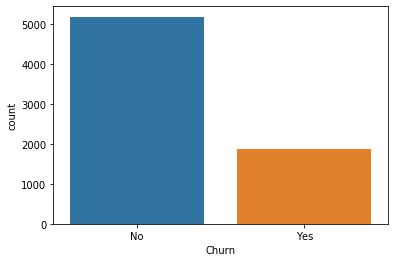

In [5]:
#Visualize the count of customer churn
sns.countplot(df['Churn'])

In [6]:
#Percentage of customers leaving 
retained = df[df.Churn == 'No']
churned = df[df.Churn == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]
#Percentage of customers that Stayed with the company
print( num_retained / (num_retained + num_churned) * 100 , "% of customers Stayed with the company.")
#Percentage of customers that left the company
print( num_churned / (num_retained + num_churned) * 100,"% of customers Left the company.")

73.4630129206304 % of customers Stayed with the company.
26.536987079369588 % of customers Left the company.


In [7]:
#Converting the total charges from object type to numeric
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+',np.nan,regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

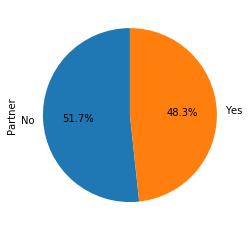

In [8]:
df.Partner.value_counts(normalize=True).plot(kind='pie',startangle=90, autopct='%1.1f%%')

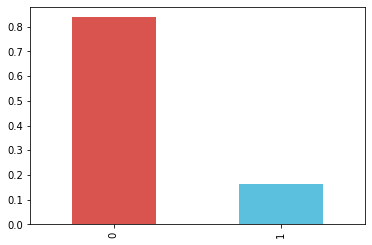

In [9]:
colors_list = ['#d9534f','#5bc0de']
df.SeniorCitizen.value_counts(normalize=True).plot(kind='bar',color = colors_list,edgecolor=None)

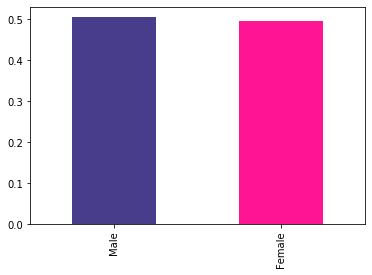

In [10]:
colors_list = ['#483D8B','#FF1493']
df.gender.value_counts(normalize=True).plot(kind='bar',color = colors_list,edgecolor=None)

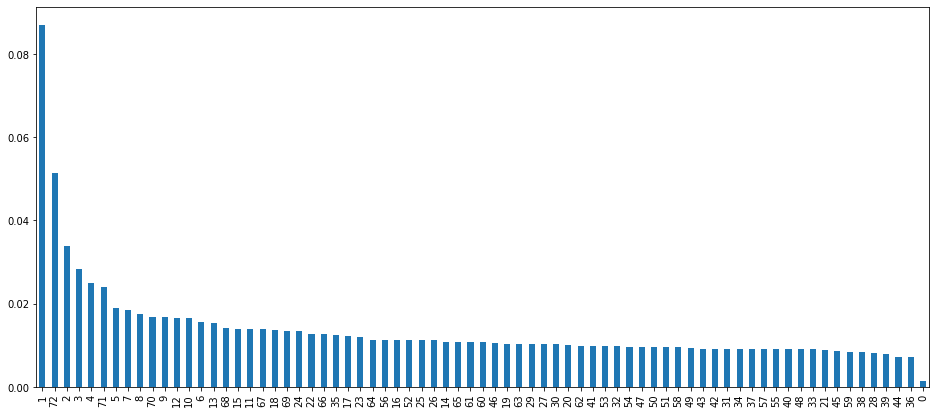

In [11]:
df.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(16,7))

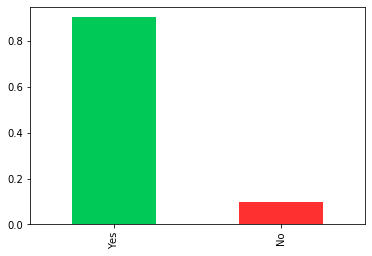

In [12]:
colors_list = ['#00C957','#FF3030']
df.PhoneService.value_counts(normalize=True).plot(kind='bar',color = colors_list,edgecolor=None)

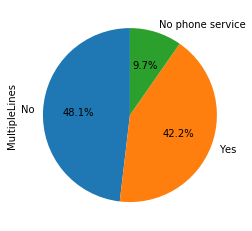

In [13]:
df.MultipleLines.value_counts(normalize=True).plot(kind='pie',startangle=90, autopct='%1.1f%%')

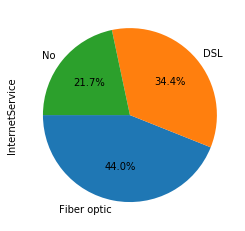

In [14]:
df.InternetService.value_counts(normalize=True).plot(kind='pie',startangle=180, autopct='%1.1f%%')

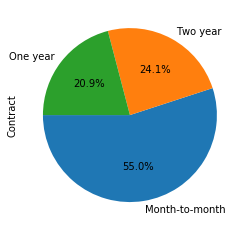

In [15]:
df.Contract.value_counts(normalize=True).plot(kind='pie',startangle=180, autopct='%1.1f%%')

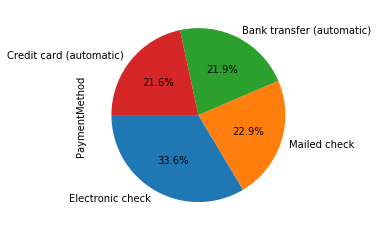

In [16]:
df.PaymentMethod.value_counts(normalize=True).plot(kind='pie',startangle=180, autopct='%1.1f%%')

**Data Analysis: Analyzing other variables with repect to the Target variable**

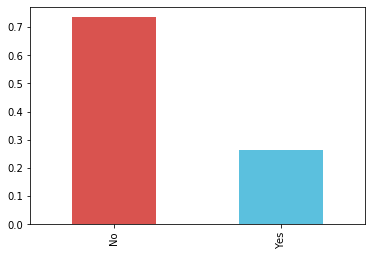

In [17]:
#Target Variable 'Churn'=Attrition Rate
colors_list = ['#d9534f','#5bc0de']
df.Churn.value_counts(normalize=True).plot(kind='bar',color = colors_list,edgecolor=None)

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


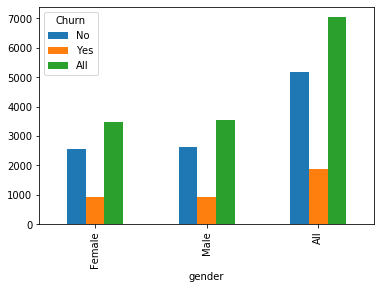

In [18]:
#Gender Vs Attrition Rate
print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar')

In [19]:
print('Percent of Females that left the Company {0}'.format((939/1869)*100))
print('Percent of Males that left the Company {0}'.format((930/1869)*100))

Percent of Females that left the Company 50.24077046548957
Percent of Males that left the Company 49.75922953451043


**Gender does'nt play an important role in predicting our Target variable.**

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


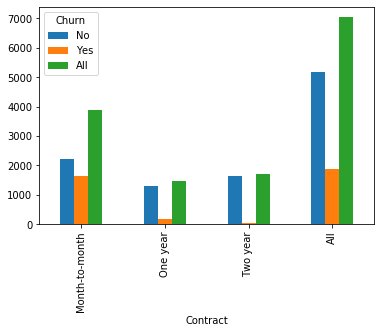

In [20]:
#Contract Vs Attrition Rate
print(pd.crosstab(df.Contract,df.Churn,margins=True))
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar')

In [21]:
print('Percent of Month-to-Month Contract People that left the Company {0}'.format((1655/1869)*100))
print('Percent of One Year Contract People that left the Company {0}'.format((166/1869)*100))
print('Percent of Two Year Contract People that left the Company {0}'.format((48/1869)*100))

Percent of Month-to-Month Contract People that left the Company 88.55002675227395
Percent of One Year Contract People that left the Company 8.881754949170679
Percent of Two Year Contract People that left the Company 2.568218298555377


**Most of the People that left were the ones who had Month-to-Month Contract.**

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


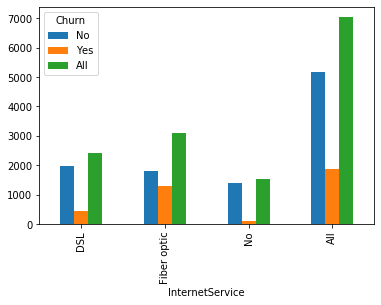

In [22]:
#InternetService Vs Attrition Rate
print(pd.crosstab(df.InternetService,df.Churn,margins=True))
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar')

In [23]:
print('Percent of DSL Internet-Service People that left the Company {0}'.format((459/1869)*100))
print('Percent of Fiber Optic-Internet Service People that left the Company {0}'.format((1297/1869)*100))
print('Percent of No Internet-Service People that left the Company {0}'.format((113/1869)*100))

Percent of DSL Internet-Service People that left the Company 24.558587479935795
Percent of Fiber Optic-Internet Service People that left the Company 69.39539860888175
Percent of No Internet-Service People that left the Company 6.046013911182451


**Most of the People that left had Fiber-Optic Internet-Service.**

Churn    No   Yes
row_0            
29.0   5174  1869


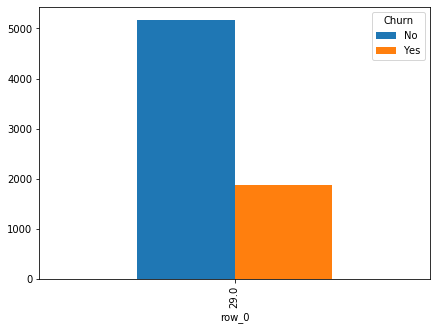

In [24]:
#Tenure Median Vs Attrion Rate
print(pd.crosstab(df.tenure.median(),df.Churn))
pd.crosstab(df.tenure.median(),df.Churn).plot(kind='bar',figsize=(7,5));

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


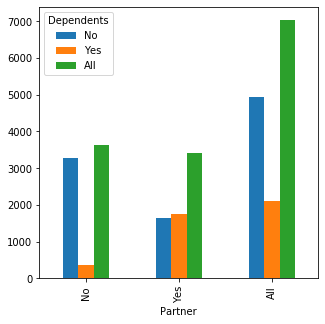

In [25]:
#Partner Vs Attrition Rate
print(pd.crosstab(df.Partner,df.Dependents,margins=True))
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5))

In [26]:
print('Percent of Partners that had Dependents {0}'.format((1749/2110)*100))
print('Percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))

Percent of Partners that had Dependents 82.8909952606635
Percent of Non-Partner that had Dependents 17.10900473933649


**Partners had a much larger percent of Dependents than Non-Partner tells us that Most Partners might be married.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


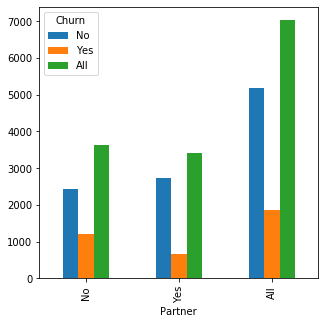

In [27]:
#Partner Vs Attrition Rate
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,margins=True).plot(kind='bar',figsize=(5,5))

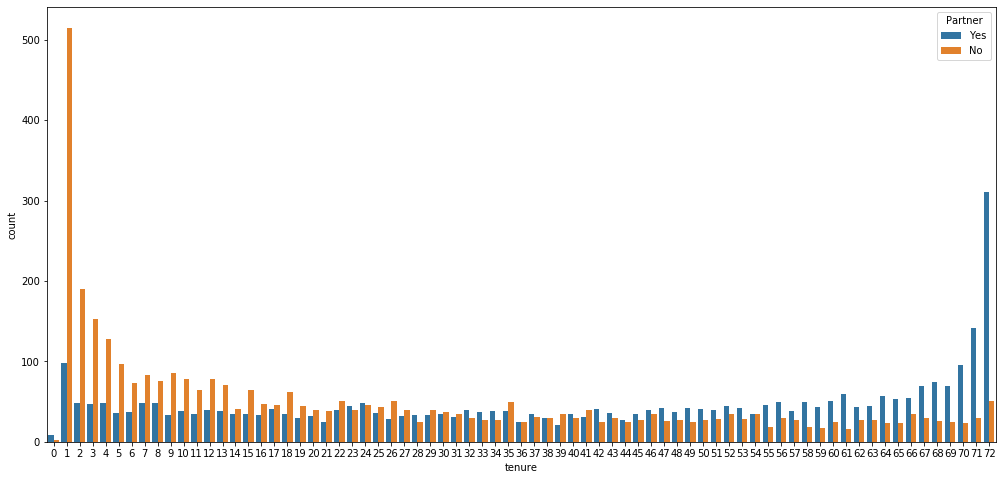

In [28]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner)

**Most of the People that were Partner will stay Longer with the Company.**

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


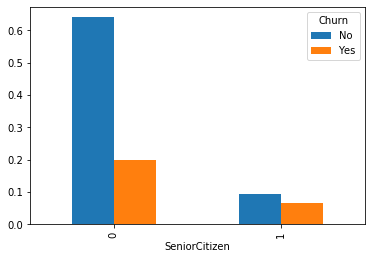

In [29]:
#SeniorCitizen Vs Attrition Rate
print(pd.crosstab(df.SeniorCitizen,df.Churn,margins=True))
pd.crosstab(df.SeniorCitizen,df.Churn,normalize=True).plot(kind='bar')

**Checking for Outliers in Monthly Charges and Total Charges using Box Plots**

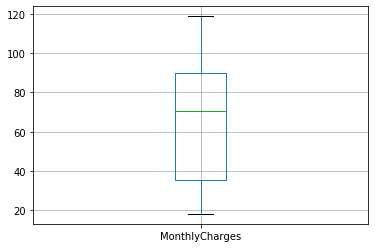

In [30]:
df.boxplot('MonthlyCharges')

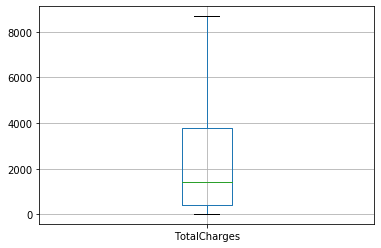

In [31]:
df.boxplot('TotalCharges')

**Both Monthly Charges and Total Charges don't have any Outliers.**

In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


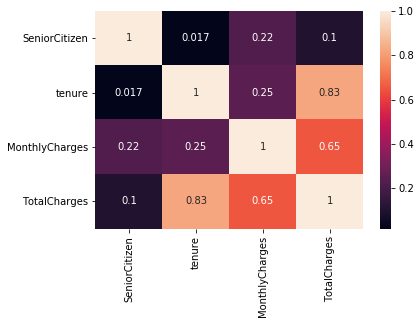

In [33]:
#Correlation Matrix
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True)

**We can see that Tenure and Total Charges are correlated and also Monthly Charges and Total Charges are also correlated with each other.So this proves our first Hypothesis correct i.e Total Charges = Monthly Charges x Tenure + Additional Tax that we had taken above.** 

**Data Munging**

In [34]:
#NULL Checking
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
#Filling 11 NULL values in TotalCharges
fill = df.MonthlyCharges*df.tenure
df.TotalCharges.fillna(fill,inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**When Attrition Rate = Yes, Median Charges in $** 

In [36]:
df.loc[(df.Churn == 'Yes'),'MonthlyCharges'].median()

79.65

In [37]:
df.loc[(df.Churn == 'Yes'),'TotalCharges'].median()

703.55

In [38]:
df.loc[(df.Churn == 'Yes'),'tenure'].median()

10.0

In [39]:
df.loc[(df.Churn == 'Yes'),'PaymentMethod'].value_counts(normalize=True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

In [40]:
df.loc[(df.Churn == 'Yes'),'PaperlessBilling'].value_counts(normalize=True)

Yes    0.749064
No     0.250936
Name: PaperlessBilling, dtype: float64

In [41]:
df.loc[(df.Churn == 'Yes'),'DeviceProtection'].value_counts(normalize=True)

No                     0.64794
Yes                    0.29160
No internet service    0.06046
Name: DeviceProtection, dtype: float64

In [42]:
df.loc[(df.Churn == 'Yes'),'OnlineBackup'].value_counts(normalize=True)

No                     0.659711
Yes                    0.279829
No internet service    0.060460
Name: OnlineBackup, dtype: float64

In [43]:
df.loc[(df.Churn == 'Yes'),'TechSupport'].value_counts(normalize=True)

No                     0.773676
Yes                    0.165864
No internet service    0.060460
Name: TechSupport, dtype: float64

In [44]:
df.loc[(df.Churn == 'Yes'),'OnlineSecurity'].value_counts(normalize=True)

No                     0.781701
Yes                    0.157838
No internet service    0.060460
Name: OnlineSecurity, dtype: float64

**Encoding the Categorical Variables with Numeric using the get dummies Property which will make it easy for the Machine to make correct Prediction.**

In [45]:
df = pd.get_dummies(df, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True) 

In [46]:
#Convert our Target Variable 'Churn' for Yes or No to 1 or 0
df = pd.get_dummies(df, columns = ['Churn'], drop_first=True)

In [47]:
#Perform Feature Scaling and One Hot Encoding
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
df[columns_for_ft_scaling] = standardScaler.fit_transform(df[columns_for_ft_scaling])

In [48]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Male,...,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,Churn_Yes
0,7590-VHVEG,-1.277445,-1.160323,-0.992611,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0.066327,-0.259629,-0.172165,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,-1.236724,-0.362660,-0.958066,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
3,7795-CFOCW,0.514251,-0.746535,-0.193672,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,9237-HQITU,-1.236724,0.197365,-0.938874,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [49]:
df.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes', 'Churn_Yes'],
      dtype='object')

**Number of columns increased and have suffixes attached, as a result of get_dummies method.**

**Data Modelling**

In [50]:
#Create Feature variable X and Target variable y
y = df['Churn_Yes']
X = df.drop(['Churn_Yes','customerID'], axis = 1)

In [51]:
#Split the data into training set (80%) and test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Using Logistic Regression Model as our Target Variable has Binary Outcome**

In [52]:
#Machine Learning classification model library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [53]:
#Fit the logistic Regression model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

#Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

In [54]:
print(f'Accuracy for Logistic Regression model is {logmodel_accuracy}%')

Accuracy for Logistic Regression model is 82.11%


**Generate Confusion Matrix**

In [55]:
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel

array([[934, 102],
       [150, 223]], dtype=int64)

**Check Precision, recall, f1-score**

In [56]:
from sklearn.metrics import classification_report
print( classification_report(y_test, pred) )

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



**From the report, We can see that the recall of the model is about 90% meaning the model correctly identified about 90% of the customers that were retained and missed about 10%.
The Precision of the model is about 86% and the f1-score is about 88%. The Accuracy of the model is about 82.11% which is better than the 73.46% that We could’ve done just by guessing a customer would always stay with the company.**

In [57]:
#Predict the probability of Attrition of each customer
df['Probability_Attrition'] = logmodel.predict_proba(df[X_test.columns])[:,1]

**Final Dataframe showcasing Probability of Attrition of each customer**

In [58]:
df[['customerID','Probability_Attrition']]

,customerID,Probability_Attrition
0,7590-VHVEG,0.650265
1,5575-GNVDE,0.043560
2,3668-QPYBK,0.274848
3,7795-CFOCW,0.032025
4,9237-HQITU,0.690915
...,...,...
7038,6840-RESVB,0.122013
7039,2234-XADUH,0.151813
7040,4801-JZAZL,0.435639
7041,8361-LTMKD,0.689602


**Conclusion: The importance of this type of analysis is to help Companies make more Profit. Hence, this analysis aimed to build a model that Predicts the Attrition Rate of customers in a Telecom Company.**